In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import dates as mpl_dates
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r"train.csv")
df.head()
df = df.set_index('Row ID')
df.head()


,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
Row ID,,,,,,,,,,,,,,,,,
1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [3]:
df = df.drop('Ship Date', axis = 1)
df.head()

,Order ID,Order Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
Row ID,,,,,,,,,,,,,,,,
1,CA-2017-152156,08/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
2,CA-2017-152156,08/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
3,CA-2017-138688,12/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
4,US-2016-108966,11/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
5,US-2016-108966,11/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


## Data Cleaning 

In [4]:
df.isnull().sum()

Order ID          0
Order Date        0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
dtype: int64

## Dropping all the null values from postal code column


In [5]:
df.dropna(inplace = True)

In [6]:
df.isnull().sum()

Order ID         0
Order Date       0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
dtype: int64

In [7]:
df.head()

,Order ID,Order Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
Row ID,,,,,,,,,,,,,,,,
1,CA-2017-152156,08/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
2,CA-2017-152156,08/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
3,CA-2017-138688,12/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
4,US-2016-108966,11/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
5,US-2016-108966,11/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [8]:
df.dtypes

Order ID          object
Order Date        object
Ship Mode         object
Customer ID       object
Customer Name     object
Segment           object
Country           object
City              object
State             object
Postal Code      float64
Region            object
Product ID        object
Category          object
Sub-Category      object
Product Name      object
Sales            float64
dtype: object

## Changing datatypes for analysis

In [9]:
df['Order Date']=pd.to_datetime(df['Order Date'])
df['Order Date'] = df['Order Date'].astype('datetime64[ns]')

df['Postal Code'] = df['Postal Code'].astype(int)
df.dtypes

Order ID                 object
Order Date       datetime64[ns]
Ship Mode                object
Customer ID              object
Customer Name            object
Segment                  object
Country                  object
City                     object
State                    object
Postal Code               int32
Region                   object
Product ID               object
Category                 object
Sub-Category             object
Product Name             object
Sales                   float64
dtype: object

## Data Visualization

<AxesSubplot:title={'center':'Dsitribution of Sales Value'}>

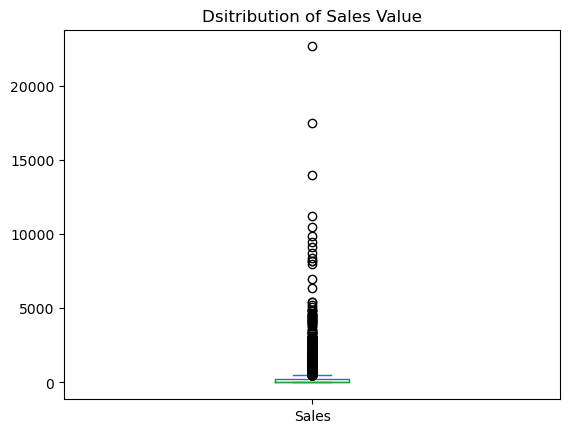

In [10]:
df['Sales'].plot(kind = 'box', title = "Dsitribution of Sales Value")

So looking at the box pllot we can say there is so much variation in the values sales column

In [11]:
df.columns

Index(['Order ID', 'Order Date', 'Ship Mode', 'Customer ID', 'Customer Name',
       'Segment', 'Country', 'City', 'State', 'Postal Code', 'Region',
       'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Sales'],
      dtype='object')

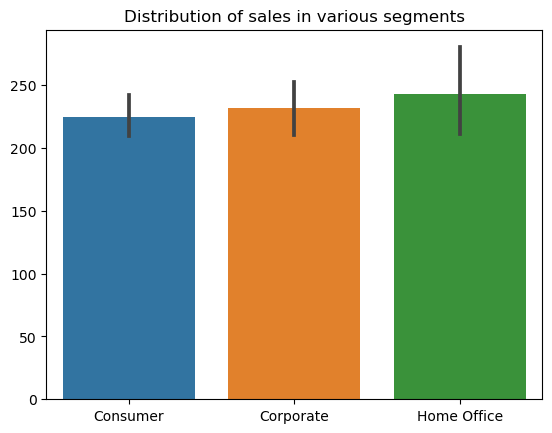

In [12]:
segment = list(df['Segment'])
sales = list(df['Sales'])
sns.barplot(segment,sales)
plt.title("Distribution of sales in various segments")
plt.show()

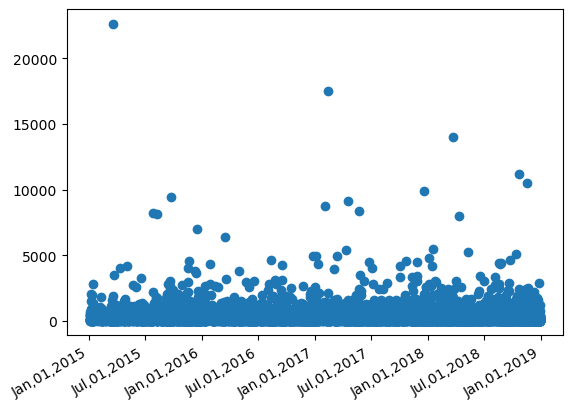

In [13]:
plt.plot_date(df['Order Date'], df['Sales'])
plt.gcf().autofmt_xdate() # to adjust the dates at x-axis
date_format = mpl_dates.DateFormatter('%b,%d,%Y') # to adjust date in correct format
plt.gca().xaxis.set_major_formatter(date_format)

Text(0.5, 1.0, 'Total No. of Orders in Months')

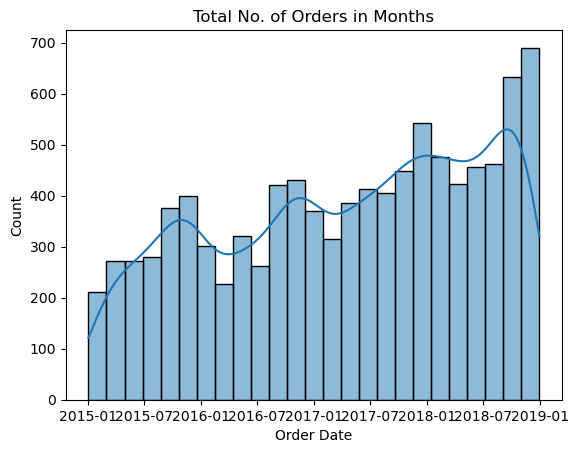

In [14]:
sns.histplot(x= df['Order Date'], bins = 25 , kde = True)
plt.title("Total No. of Orders in Months")


 By this plot we can interpret how the order varies over the months. we can say
 1. As the E-commerce has increased after 2017 online sales has increased


In [15]:
df.describe(include = 'all')

,Order ID,Order Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
count,9789,9789,9789,9789,9789,9789,9789,9789,9789,9789.000000,9789,9789,9789,9789,9789,9789.000000
unique,4916,1229,4,793,793,3,1,529,48,NaN,4,1860,3,17,1848,NaN
top,CA-2018-100111,2017-05-09 00:00:00,Standard Class,WB-21850,William Brown,Consumer,United States,New York City,California,NaN,West,OFF-PA-10001970,Office Supplies,Binders,Staple envelope,NaN
freq,14,38,5849,35,35,5096,9789,891,1946,NaN,3140,18,5903,1492,47,NaN
first,NaN,2015-01-02 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2018-12-30 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,55273.322403,NaN,NaN,NaN,NaN,NaN,230.116193
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32041.223413,NaN,NaN,NaN,NaN,NaN,625.302079
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1040.000000,NaN,NaN,NaN,NaN,NaN,0.444000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23223.000000,NaN,NaN,NaN,NaN,NaN,17.248000


Text(0.5, 1.0, 'Distribution of Sales by Region')

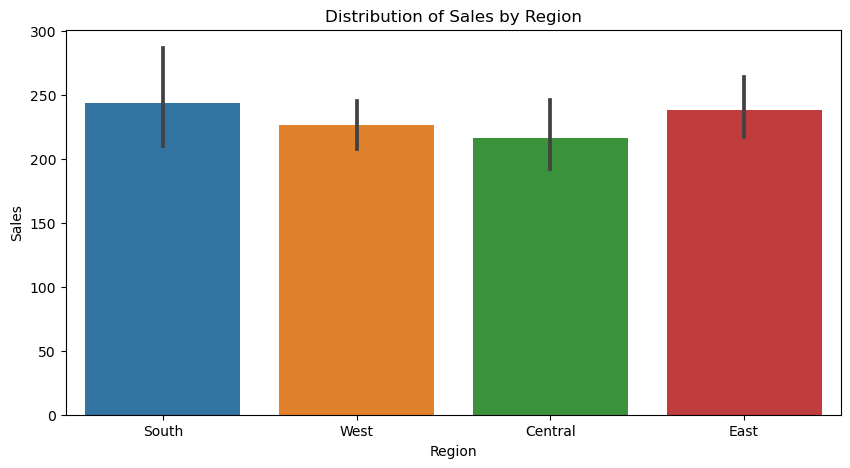

In [16]:
plt.figure(figsize=(10,5))
sns.barplot(x=df["Region"], y=df["Sales"])
plt.title('Distribution of Sales by Region')

Text(0.5, 1.0, 'Distribution of various product categories in segment')

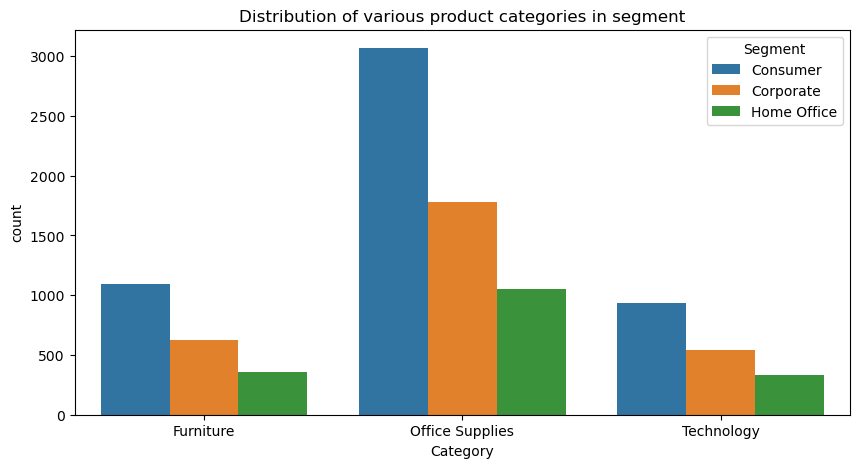

In [17]:
plt.figure(figsize=(10,5))
sns.countplot(x=df["Category"],hue = df['Segment'])
plt.title("Distribution of various product categories in segment")

In [18]:
df['Product Name'].unique()

array(['Bush Somerset Collection Bookcase',
       'Hon Deluxe Fabric Upholstered Stacking Chairs, Rounded Back',
       'Self-Adhesive Address Labels for Typewriters by Universal', ...,
       'Cisco 8961 IP Phone Charcoal', 'Eureka Hand Vacuum, Bagless',
       'LG G2'], dtype=object)

## Bivariate Analysis

# let's make the Corelation Matrix


<AxesSubplot:>

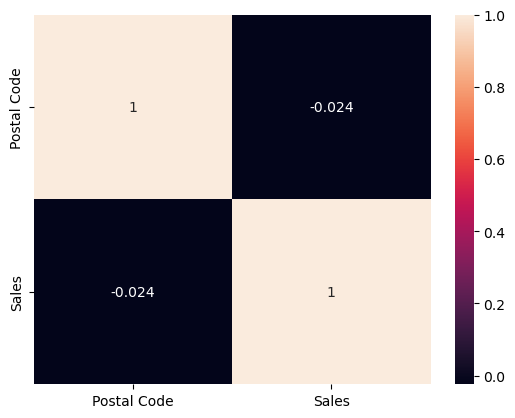

In [19]:
#plotting the heatmap for correlation
sns.heatmap(df.corr(), annot=True)

As the heatmap show negative relation between both numeric value so we conclude
that sales do not depend on postal code

Text(0.5, 1.0, 'Sales Distribution by Postal Code')

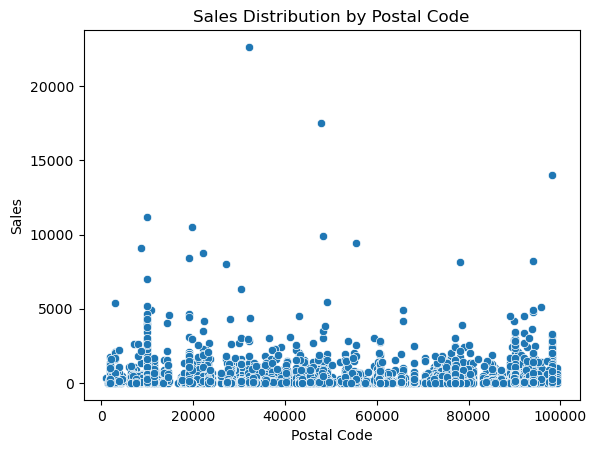

In [20]:
sns.scatterplot( x= df['Postal Code'], y= df['Sales'] )
plt.title("Sales Distribution by Postal Code")

There is no specific trend seen in the scatter plot so the sales is not depemdent on postal code
as we have seen with correlation matrix

array([[<AxesSubplot:title={'center':'Order Date'}>,
        <AxesSubplot:title={'center':'Postal Code'}>],
       [<AxesSubplot:title={'center':'Sales'}>, <AxesSubplot:>]],
      dtype=object)

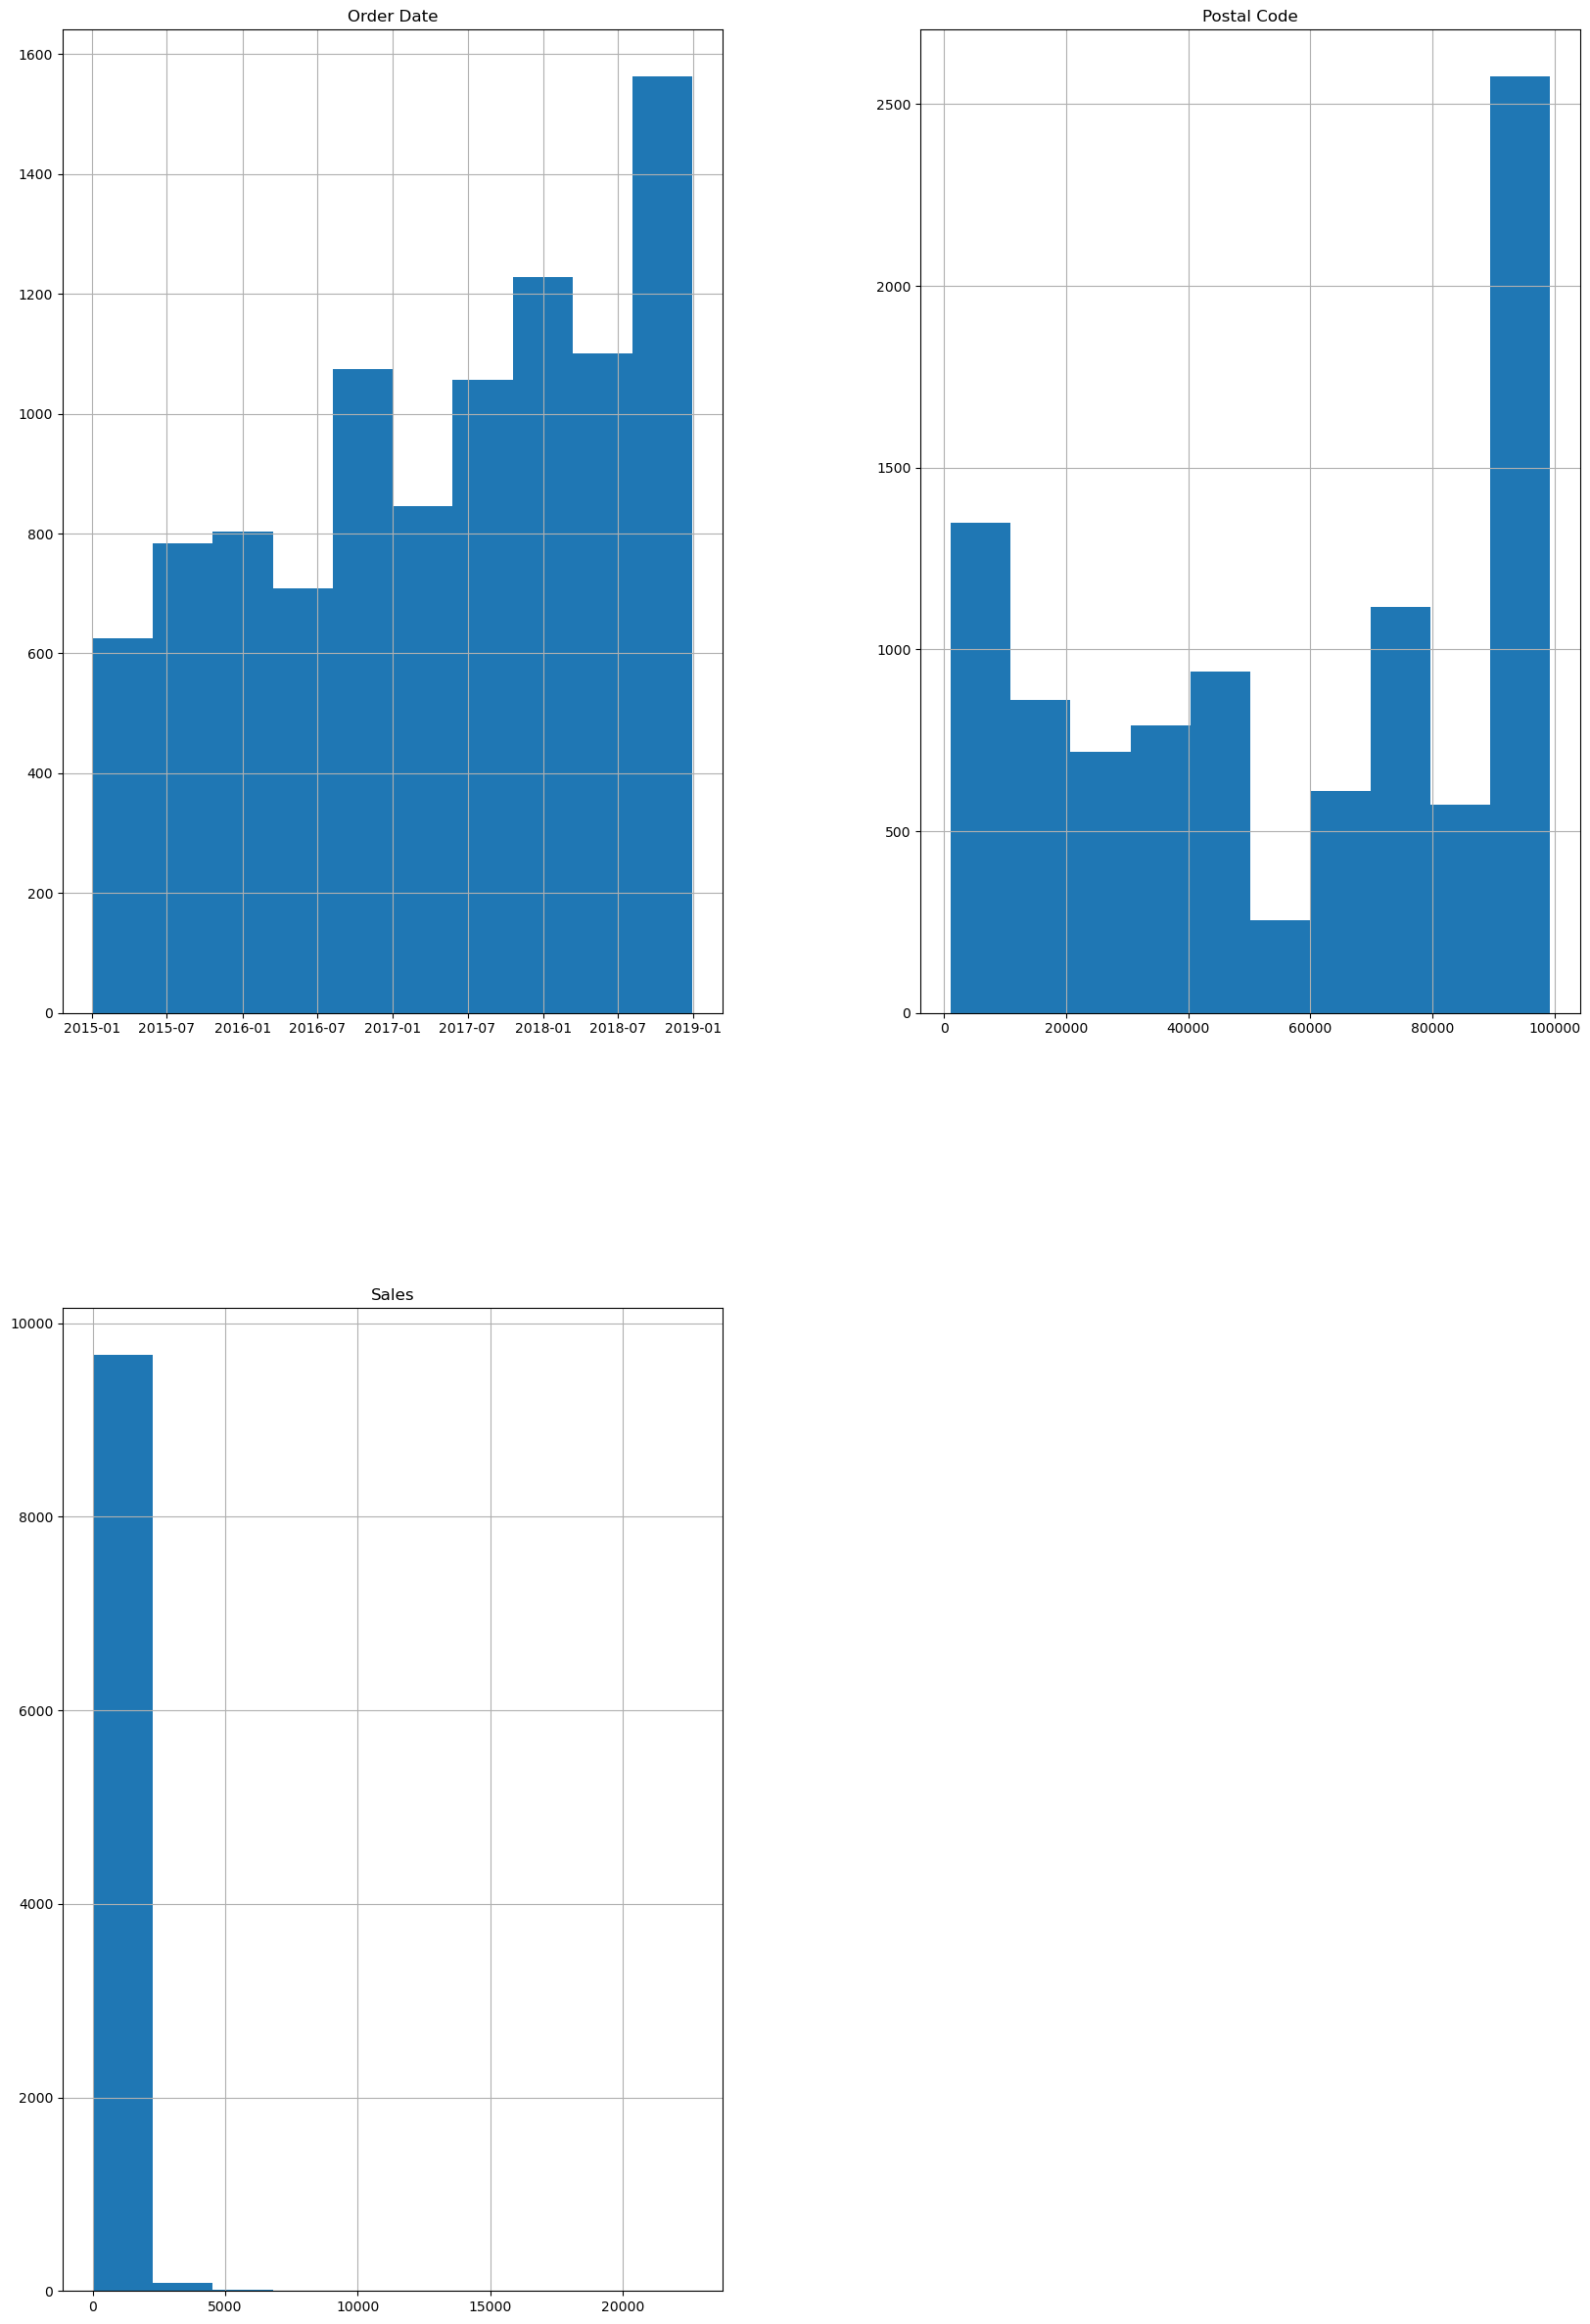

In [21]:
df.hist(figsize=(20,30))

 By the above subplot we can conclude that
 1. No. of orders increases in recent years so as the shipping of orders.
 2. the order recieved by area with larger no. postal code are higher than others.
 3. the order are more likely to be of products which are below 5000$.
 

In [22]:
df.columns

Index(['Order ID', 'Order Date', 'Ship Mode', 'Customer ID', 'Customer Name',
       'Segment', 'Country', 'City', 'State', 'Postal Code', 'Region',
       'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Sales'],
      dtype='object')

Text(0.5, 1.0, 'Distribution of sold product categories in different regions')

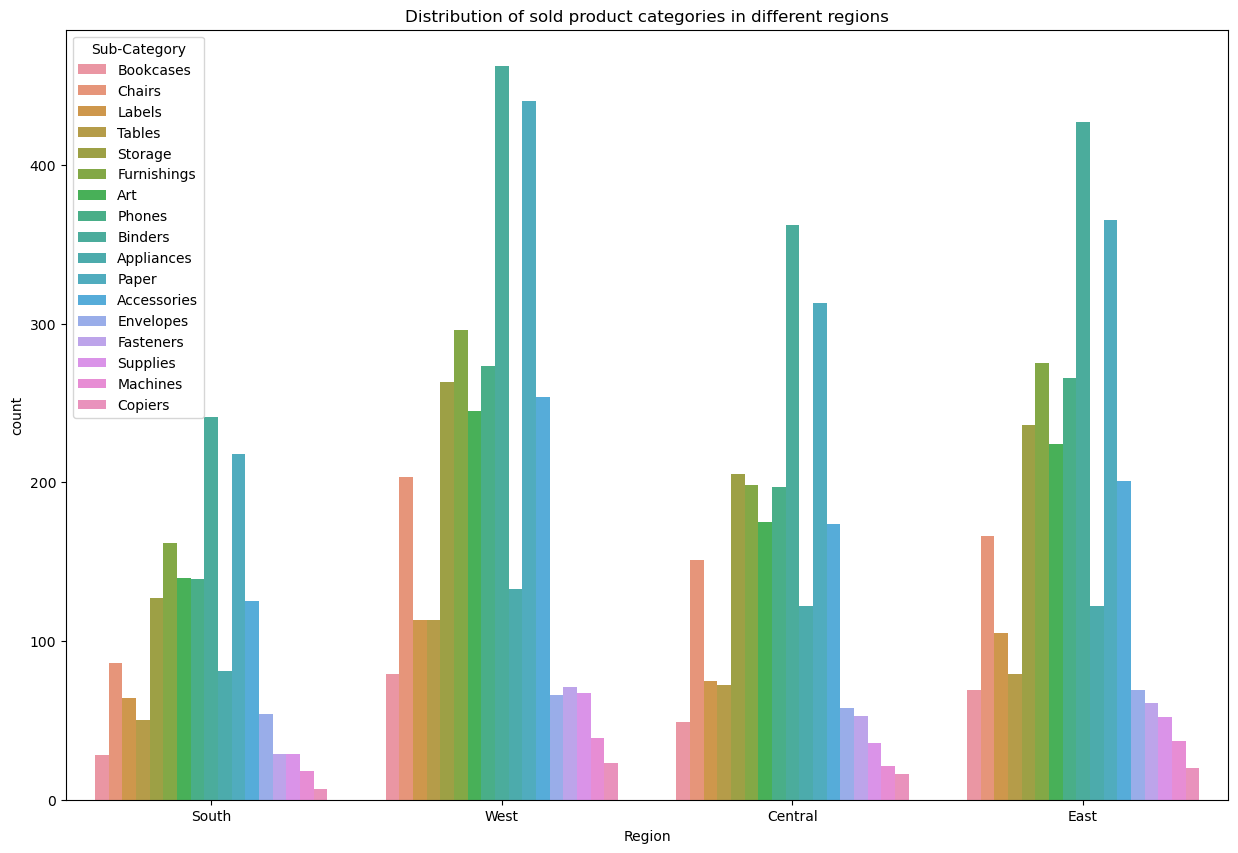

In [23]:
plt.figure(figsize=(15,10))
sns.countplot(x=df["Region"],hue = df['Sub-Category'])
plt.title("Distribution of sold product categories in different regions")